In [1]:
import logging
import os
from os.path import splitext
from os import listdir
import sys
from utils.data_vis import plot_img_and_mask
from utils.dataset import BasicMedicalDataset, cast_to_image
from torch.utils.data import DataLoader, random_split
import torchvision
from glob import glob
from torchvision import datasets, transforms
from torch.utils import data
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
root_imgs_dir = '../data/'
imgs_dir_name = 'T1'
mask_dir_name = 'MN'
dataset = BasicMedicalDataset(root_imgs_dir, imgs_dir_name, mask_dir_name)
val_percent = 0.2
batch_size = 2
epochs = 5
n_val = int(len(dataset) * val_percent)
n_train = len(dataset) - n_val
print(f'number of validation : {n_val}')
print(f'number of training : {n_train}')

number of validation : 41
number of training : 166


In [3]:
train, val = random_split(dataset, [n_train, n_val])

In [4]:
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True, drop_last=True)

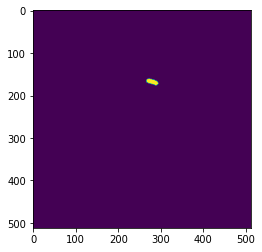

In [6]:
for epoch in range(epochs):
    for batch in train_loader:
        imgs = batch['image']
        true_masks = batch['mask']
        
        #plt.imshow(cast_to_image(imgs[0]))
        plt.imshow(cast_to_image(true_masks[0]))